Lambda School Data Science

*Unit 1, Sprint 1, Module 1*

---

# A FIRST LOOK AT DATA ASSIGNMENT

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




In [0]:
# import the libraries that will be used.
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [0]:
# using same data set from lecture.

# radin the .csv file.
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
# print the shape of the data frame.
print(drinks.shape)
# show the data frame with headers.
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
# look at all the column names.
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
# list the rows in non ascending order by 'wine_servings'.
drinks.sort_values('wine_servings', ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [0]:
# show the statistics for the 'wine_servings' column.
drinks['wine_servings'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine_servings, dtype: float64

In [0]:
# show the largest 10 values in the 'wine_servings' column.
drinks.nlargest(10, 'wine_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine
61,France,127,151,370,11.8,high
136,Portugal,194,67,339,11.0,high
3,Andorra,245,138,312,12.4,high
166,Switzerland,185,100,280,10.2,medium
48,Denmark,224,81,278,10.4,medium
156,Slovenia,270,51,276,10.6,medium
99,Luxembourg,236,133,271,11.4,medium
42,Croatia,230,87,254,10.2,medium
83,Italy,85,42,237,6.5,medium
55,Equatorial Guinea,92,0,233,5.8,medium


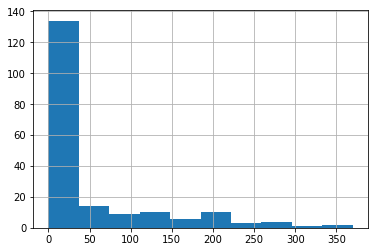

In [0]:
# create a histogram of the 'wine_servings' column.
drinks.wine_servings.hist()
# show the histrogram.
plt.show()

In [0]:
# add a column at the end to give some text to the 'wine_servings' score.
drinks['drinks_wine'] = np.where(drinks['wine_servings'] > 300, 'high',
                           np.where(drinks['wine_servings'] >= 150, 'medium',
                           np.where(drinks['wine_servings'] == 0, 'none', 'low')))
                        
# show the headers of the data set.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [0]:
# show the new values for the new 'drinks_wine' column.
drinks.drinks_wine.value_counts()

low       137
none       31
medium     22
high        3
Name: drinks_wine, dtype: int64

## Joining Another Dataset

In [0]:
# join the countries data set from lecture.

# label and read in the .csv file.
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

In [0]:
# show the columns of the data frame we want to merge.
countries[['name','region','sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [0]:
# use pd.merge to merge the data sets together, selecting the columns that we want to merge.
df = pd.merge(drinks, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa


In [0]:
# show how many NA values there are and where.
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_wine                      0
name                            26
region                          26
sub-region                      26
dtype: int64

In [0]:
# show which countries did not join properly and have an NA.
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_wine,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,low,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,low,NaN,NaN,NaN


In [0]:
# look specifically at 'Czech Republic'.
drinks.iloc[45]

country                         Czech Republic
beer_servings                              361
spirit_servings                            170
wine_servings                              134
total_litres_of_pure_alcohol              11.8
drinks_wine                                low
Name: 45, dtype: object

In [0]:
# show the value counts for the 'region' column.
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    27
Oceania     15
Name: region, dtype: int64

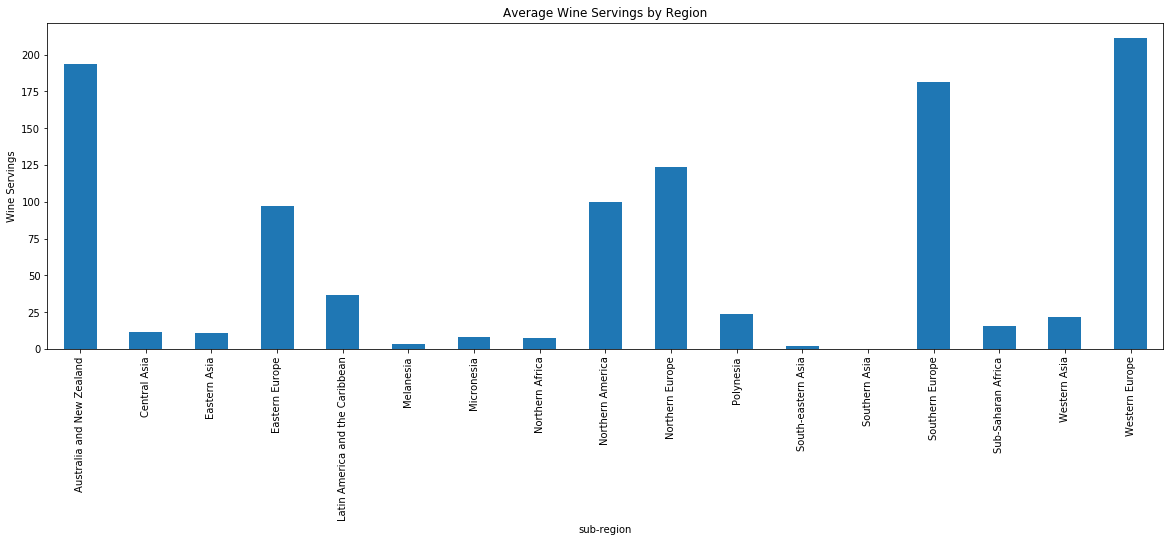

In [0]:
# use group by and create a bar plot with 'sub_region' and 'wine_servings' columns, enlarge the garph with figsize.
df.groupby('sub-region').wine_servings.mean().plot(kind='bar', figsize=(20,6))
# give the graph a title.
plt.title('Average Wine Servings by Region')
# label the y axis.
plt.ylabel('Wine Servings')
# show the bar plot.
plt.show()

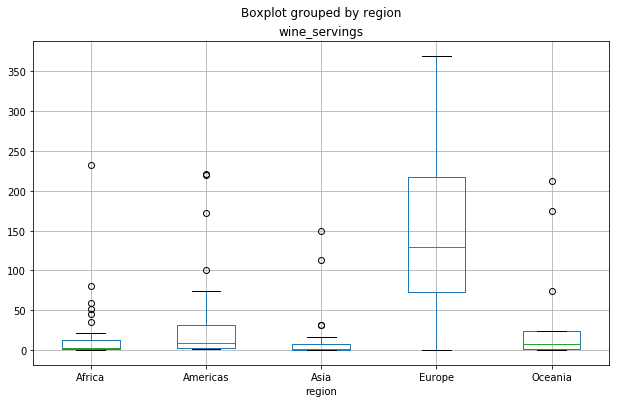

In [0]:
# create a boxplot for columns 'wine_servings' and 'region'.
df.boxplot(column='wine_servings', by='region', figsize=(10,6))
# show the box plot.
plt.show()

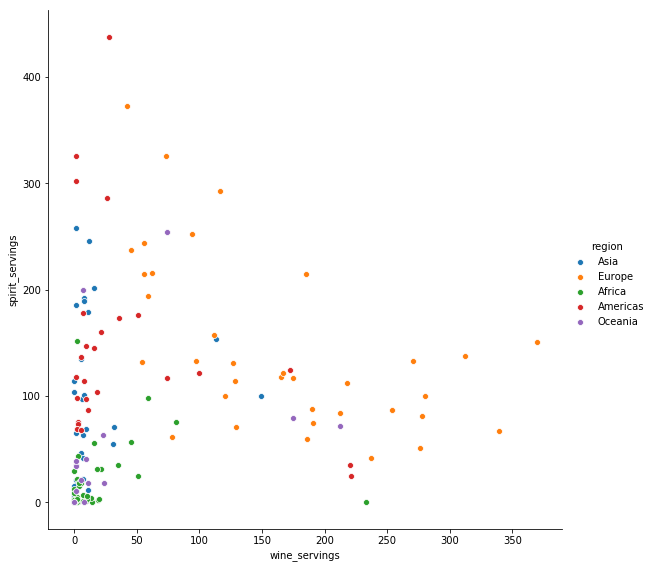

In [0]:
# create a pairplot with 'wine_servings' as x axis and 'spirit_servings' as y axis, and color the data based on the 'region' column.
sns.pairplot(x_vars=["wine_servings"], y_vars=["spirit_servings"], data=df, hue="region", height=8)
# show the pair plot.
plt.show()

## Awesome Bokeh Plot

In [0]:
.# drop rows with NAs for Bokeh Interactive plot
df = df.dropna(subset=["region"])
# show the new shape of the data set with the dropped rows.
df.shape

(167, 9)

In [0]:
# Bokeh plot code.
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.wine_servings.values
y = df.spirit_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)
# create figure and plot.
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Wine and Spirit Servings per Year by Country")
# create plot.
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)
# add axis labels.
p.xaxis.axis_label = "Wine Servings"
p.yaxis.axis_label = "Spirit Servings"

output_file('interactive_bokeh_plot.html')
show(p)

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.